# 读取SEG岩丘模型并输出

In [1]:
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import pyvista as pv

## 三维模型数据

In [2]:
DATAPATH = './data/VEL_GRIDS/'

# Dimensions
nx, ny, nz = 676, 676, 210

# Extract Saltf@@ from SALTF.ZIP
zipfile.ZipFile(DATAPATH+'SALTF.ZIP', 'r').extract('Saltf@@', path=DATAPATH)

# Load data
with open(DATAPATH+'Saltf@@', 'r') as file:
    vel = np.fromfile(file, dtype=np.dtype('float32').newbyteorder('>'))
    vel = vel.reshape(nx, ny, nz, order='F')
    
    # Cast type
    vel = np.asarray(vel, dtype=float)

    # THE SEG/EAGE salt-model uses positive z downwards;
    # here we want positive upwards. Hence:
    vel = np.flip(vel, 2)

# Create the PyVista UniformGrid
vel_grid=pv.UniformGrid()
vel_grid.dimensions=np.array(vel.shape)+1
vel_grid.origin=(0,0,0)
vel_grid.spacing=(20,20,20)
vel_grid.cell_data['velocity']=vel.flatten(order="F")

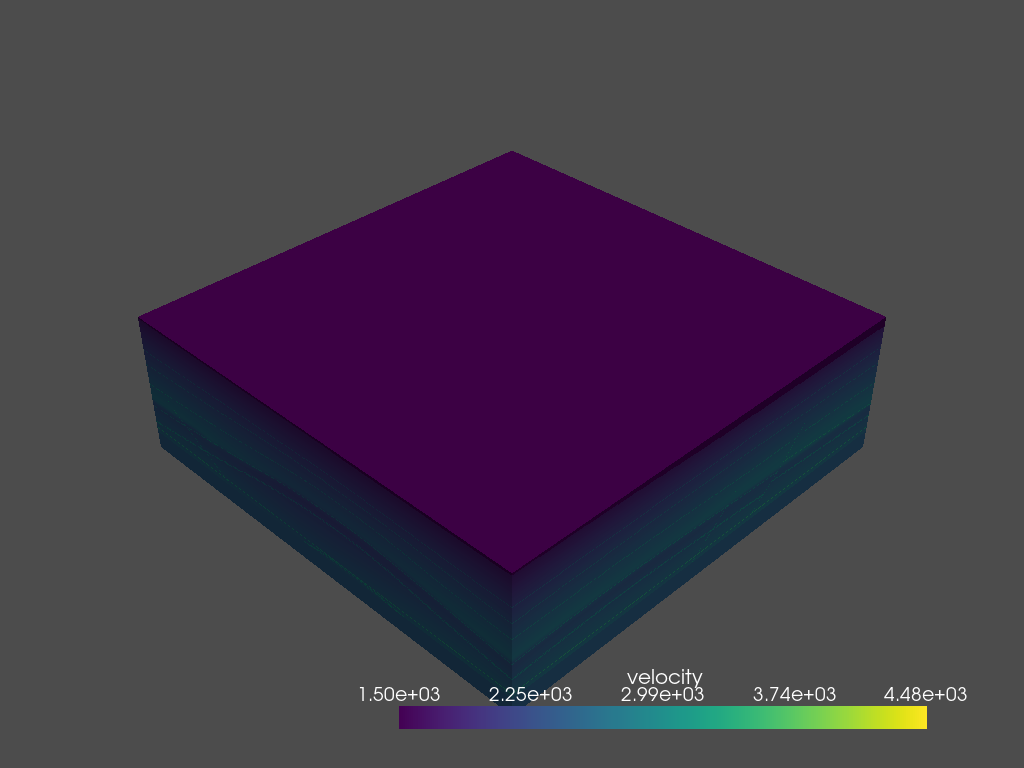

In [3]:
pv.set_jupyter_backend('none')
p=pv.Plotter()
p.add_mesh(vel_grid)
p.show()

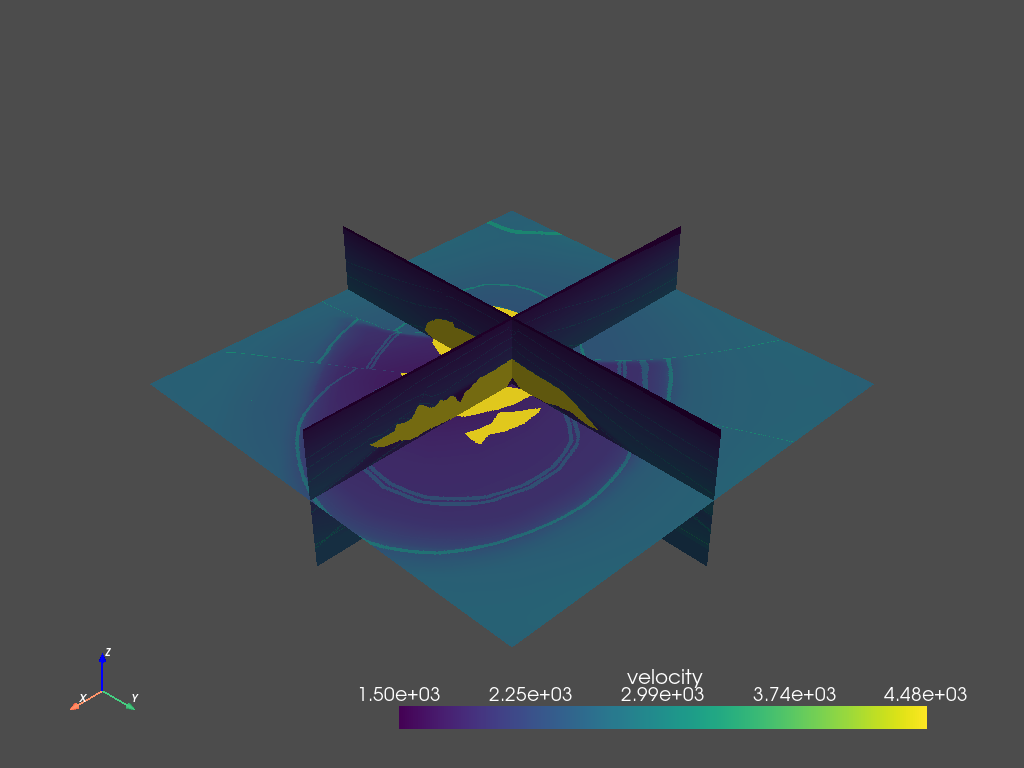

In [4]:
slices=vel_grid.slice_orthogonal()
slices.plot()

## 二维切片

In [5]:
def read_vel_slice2d(filename,nx,nz):
    """
    读取二维切片数据
    """
    with open(filename, 'r') as file:
        vel = np.fromfile(file, dtype=np.dtype('float32').newbyteorder('>'))
        # vel = vel.reshape(nx, nz, order='F')
        vel = vel.reshape(nz,nx)
        # Cast type
        vel = np.asarray(vel, dtype=float)
        # THE SEG/EAGE salt-model uses positive z downwards;
        # here we want positive upwards. Hence:
        # vel = np.flip(vel, 2)
        return vel


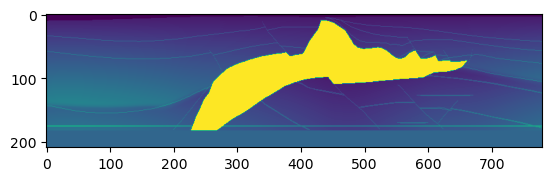

In [6]:
saltaa=read_vel_slice2d(filename='./data/VEL_GRIDS/saltaa@',nx=780,nz=209)
plt.imshow(saltaa)

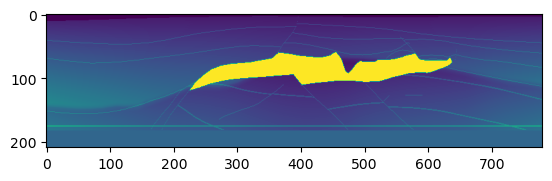

In [7]:
saltbb=read_vel_slice2d(filename='./data/VEL_GRIDS/saltbb@',nx=780,nz=209)
plt.imshow(saltbb)

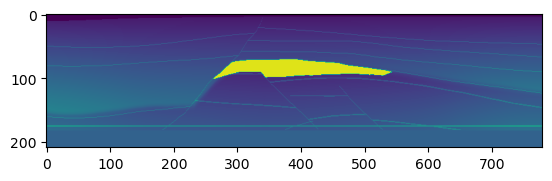

In [8]:
saltcc=read_vel_slice2d(filename='./data/VEL_GRIDS/saltcc@',nx=780,nz=209)
plt.imshow(saltcc)

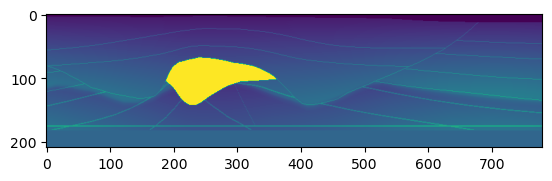

In [9]:
saltdd=read_vel_slice2d(filename='./data/VEL_GRIDS/saltdd@',nx=780,nz=209)
plt.imshow(saltdd)

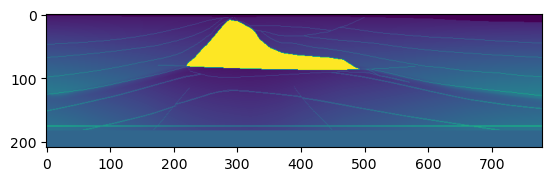

In [10]:
saltee=read_vel_slice2d(filename='./data/VEL_GRIDS/saltee@',nx=780,nz=209)
plt.imshow(saltee)

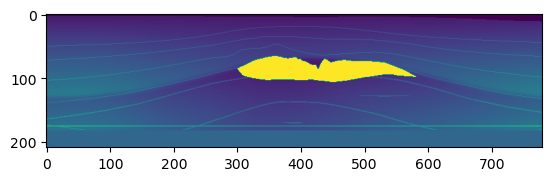

In [11]:
saltff=read_vel_slice2d(filename='./data/VEL_GRIDS/saltff@',nx=780,nz=209)
plt.imshow(saltff)

In [13]:
np.save('SEG-Salt-3D-Model-2D-Sclice-aa',saltaa)
np.savetxt('SEG-Salt-3D-Model-2D-Sclice-aa.csv',saltaa)